In [1]:
#Let's do the usual imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading Our data
df= pd.read_csv('../input/crypto-markets.csv', parse_dates=['date'], index_col='date')

In [3]:
df.head()

,symbol,open,high,low,close,volume,market,name,ranknow
date,,,,,,,,,
2013-04-28,BTC,135.30,135.98,132.10,134.21,0,1500520000,Bitcoin,1
2013-04-29,BTC,134.44,147.49,134.00,144.54,0,1491160000,Bitcoin,1
2013-04-30,BTC,144.00,146.93,134.05,139.00,0,1597780000,Bitcoin,1
2013-05-01,BTC,139.00,139.89,107.72,116.99,0,1542820000,Bitcoin,1
2013-05-02,BTC,116.38,125.60,92.28,105.21,0,1292190000,Bitcoin,1


In [4]:
df.tail()

,symbol,open,high,low,close,volume,market,name,ranknow
date,,,,,,,,,
2017-12-17,IGNIS,2.090000,2.380000,2.090000,2.160000,10272,0,Ignis [Futures],1367
2017-12-18,IGNIS,2.160000,2.640000,2.060000,2.540000,3385,0,Ignis [Futures],1367
2017-12-17,BTCA,0.012830,0.014488,0.012793,0.014465,209739,0,Bitair,1368
2017-12-18,BTCA,0.014301,0.017507,0.010392,0.012712,223386,0,Bitair,1368
2017-12-18,LOC,0.693261,1.090000,0.684387,0.891086,169077,0,LockChain,1369


**We have a lot of cryptocurrencies. I'll just try to focus on Bitcoin here. Also notcie that there's no volume values. I wonder why?**

In [5]:
btc=df[df['symbol']=='BTC']#Extracting the bitcoin data from the dataframe
btc.drop(['volume','symbol','name','ranknow','market'],axis=1,inplace=True)#Just dropping columns here!

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
btc.isnull().any()#We don't have any NaN values luckily

open     False
high     False
low      False
close    False
dtype: bool

In [7]:
btc.shape #We can see that we have 1696 observations for bitcoin here 

(1696, 4)

In [8]:
btc.tail()#Our data is pretty up to date it seems! 

,open,high,low,close
date,,,,
2017-12-14,16384.6,17085.8,16185.9,16564.0
2017-12-15,16601.3,18154.1,16601.3,17706.9
2017-12-16,17760.3,19716.7,17515.3,19497.4
2017-12-17,19475.8,20089.0,18974.1,19140.8
2017-12-18,19106.4,19371.0,18355.9,19114.2


**Lets draw that famous stock market graph and get surprised of Bitcoin's huge growth**

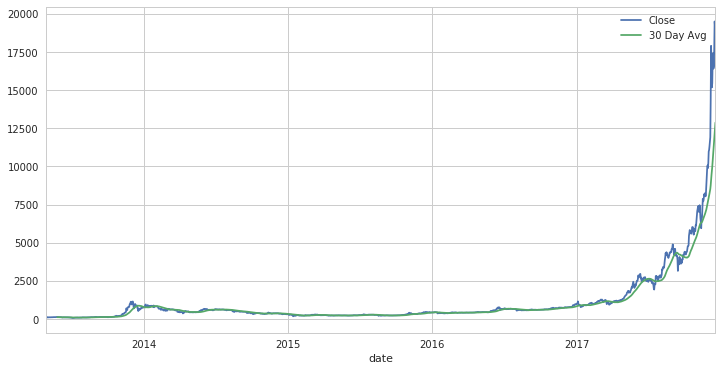

In [9]:
sns.set()
sns.set_style('whitegrid')
btc['close'].plot(figsize=(12,6),label='Close')
btc['close'].rolling(window=30).mean().plot(label='30 Day Avg')# Plotting the 
#rolling 30 day average against the Close Price
plt.legend()

![](http://)**Just because I'm a regression nerd, I will be using it to predict the behaviour of Bitcoin a month into the future. And to be honest, the graph of the last few months looks like a line to me! **

In [10]:
#I will be adding a feature to improve the model.This feature is provided by Tafarel Yan in his Kernel

btc['ohlc_average'] = (btc['open'] + btc['high'] + btc['low'] + btc['close']) / 4

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
btc.head()

,open,high,low,close,ohlc_average
date,,,,,
2013-04-28,135.30,135.98,132.10,134.21,134.3975
2013-04-29,134.44,147.49,134.00,144.54,140.1175
2013-04-30,144.00,146.93,134.05,139.00,140.9950
2013-05-01,139.00,139.89,107.72,116.99,125.9000
2013-05-02,116.38,125.60,92.28,105.21,109.8675


In [12]:
btc['Price_After_Month']=btc['close'].shift(-30) #This will be our label

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
btc.tail()#We basically moved all our values 30 lines up in our last cell

,open,high,low,close,ohlc_average,Price_After_Month
date,,,,,,
2017-12-14,16384.6,17085.8,16185.9,16564.0,16555.075,NaN
2017-12-15,16601.3,18154.1,16601.3,17706.9,17265.900,NaN
2017-12-16,17760.3,19716.7,17515.3,19497.4,18622.425,NaN
2017-12-17,19475.8,20089.0,18974.1,19140.8,19419.925,NaN
2017-12-18,19106.4,19371.0,18355.9,19114.2,18986.875,NaN


In [14]:
#Preprocessing
from sklearn import preprocessing
btc.dropna(inplace=True)
X=btc.drop('Price_After_Month',axis=1)
X=preprocessing.scale(X)#We need to scale our values to input them in our model
y=btc['Price_After_Month']



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
from sklearn import cross_validation
X_train,X_test,y_train,y_test=cross_validation.train_test_split(X,y,test_size=0.3,random_state=101)

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=200,random_state=101)
reg.fit(X_train,y_train)
accuracy=reg.score(X_test,y_test)
accuracy=accuracy*100
accuracy = float("{0:.4f}".format(accuracy))
print('Accuracy is:',accuracy,'%')#This percentage shows how much our regression fits our data

Accuracy is: 91.7867 %


In [17]:
preds = reg.predict(X_test)
print("The prediction is:",preds[1],"But the real value is:" ,y_test[1])
#We can see that our predictions are kind of accurate but we still need to work on on them a lot. 

The prediction is: 607.14875 But the real value is: 607.15


In [18]:
#Apply our model and get our prediction
X_30=X[-30:]#We'll take the last 30 elements to make our predictions on them
forecast=reg.predict(X_30)

In [19]:
#creating a new column which contains the predictions! 
#Proceed at your own risk!  
from datetime import datetime, timedelta
last_date=btc.iloc[-1].name
modified_date = last_date + timedelta(days=1)
date=pd.date_range(modified_date,periods=30,freq='D')
df1=pd.DataFrame(forecast,columns=['Forecast'],index=date)
btc=btc.append(df1)
btc.tail()

,Forecast,Price_After_Month,close,high,low,ohlc_average,open
2017-12-14,15028.3660,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-15,12557.5675,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-16,18573.0780,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-17,18982.8710,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-18,18945.9850,NaN,NaN,NaN,NaN,NaN,NaN


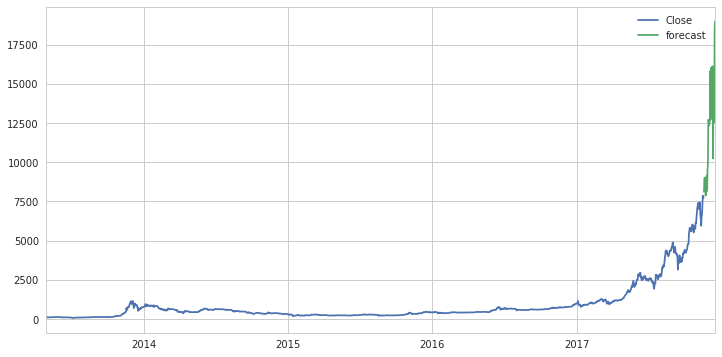

In [20]:
#Now we'll plot our forecast! 
btc['close'].plot(figsize=(12,6),label='Close')
btc['Forecast'].plot(label='forecast')
plt.legend()

**Bitcoin was about 18000 USD on the 18th of December and our model predicted it to be 18945 USD! You can see the potential here!We've achieved this with just a basic model. Maybe I'll do a better predictive model in the future. I'll leave it here for now.**

**Thank you for you attention**